# Predicting Evergreeness of Content with Decision Trees and Random Forests

In [3]:
## DATA DICTIONARY
data.boilerplate.head().values
#boilerplate is a string and json can parse it
#loads means load string, can then access the title and the body
#why store data in this way? 

array([ '{"title":"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries","body":"A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose California Photographer Tony Avelar Bloomberg By 2015 your mobile phone will project a 3 D image of anyone who calls and your laptop will be powered by kinetic energy At least that s what International Business Machines Corp sees in its crystal ball The predictions are part of an annual tradition for the Armonk New York based company which surveys its 3 000 researchers to find five ideas expected to take root in the next five years IBM the world s largest provider of computer services looks to Silicon Valley for input gleaning many ideas from its Almaden research center in 

In [2]:
import pandas as pd
import json
import seaborn as sns
%matplotlib inline


data = pd.read_csv("../dataset/stumbleupon.tsv", sep='\t')
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', ''))
data['body'] = data.boilerplate.map(lambda x: json.loads(x).get('body', ''))
data.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,title,body
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,24,0,5424,170,8,0.152941,0.079130,0,IBM Sees Holographic Calls Air Breathing Batte...,A sign stands outside the International Busine...
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,40,0,4973,187,9,0.181818,0.125448,1,The Fully Electronic Futuristic Starting Gun T...,And that can be carried on a plane without the...
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,55,0,2240,258,11,0.166667,0.057613,1,Fruits that Fight the Flu fruits that fight th...,Apples The most popular source of antioxidants...
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,24,0,2737,120,5,0.041667,0.100858,1,10 Foolproof Tips for Better Sleep,There was a period in my life when I had a lot...
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,14,0,12032,162,10,0.098765,0.082569,0,The 50 Coolest Jerseys You Didn t Know Existed...,Jersey sales is a curious business Whether you...


## Predicting "Greenness" Of Content

This dataset comes from [stumbleupon](https://www.stumbleupon.com/), a web page recommender. A description of the columns is below:

FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
title|string|Title of the article
body|string|Body text of article
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonlinkratio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonlinkratio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonlinkratio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonlinkratio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of <embed> usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an <a> with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of <img> tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>|markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

### What are 'evergreen' sites?

> #### Evergreen sites are those that are always relevant.  As opposed to breaking news or current events, evergreen websites are relevant no matter the time or season. 

> #### A sample of URLs is below, where label = 1 are 'evergreen' websites

In [4]:
data[['url', 'label']].head()

,url,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,0
1,http://www.popsci.com/technology/article/2012-...,1
2,http://www.menshealth.com/health/flu-fighting-...,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,1
4,http://bleacherreport.com/articles/1205138-the...,0


### Exercises to Get Started

> ### Exercise: 1. In a group: Brainstorm 3 - 5 features you could develop that would be useful for predicting evergreen websites.
 ###  Exercise: 2. After looking at the dataset, can you model or quantify any of the characteristics you wanted?
- I.E. If you believe high-image content websites are likely to be evergreen, how can you build a feature that represents that?
- I.E. If you believe weather content is likely NOT to be evergreen, how might you build a feature that represents that?

### Split up and develop 1-3 of the those features independently.

count    7395.000000
mean        0.275709
std         1.919320
min        -1.000000
25%         0.025900
50%         0.083051
75%         0.236700
max       113.333333
Name: image_ratio, dtype: float64

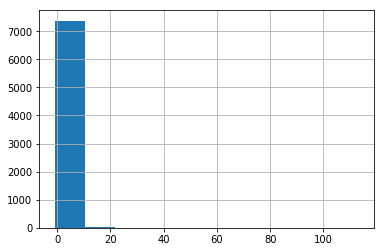

In [9]:
#Feature 1
#I.E. If you believe high-image content websites are likely to be evergreen, 
#how can you build a feature that represents that?

data['image_ratio'].hist()
data['image_ratio'].describe()

In [10]:
data['high_image_page'] = data['image_ratio'].map(lambda x: x>0.236700)
#lambda creates anonymous function

In [ ]:
#Feature 2
#I.E. If you believe weather content is likely NOT to be evergreen, 
#how might you build a feature that represents that?

> ### Exercise: 3. Does being a news site affect evergreeness? 
Compute or plot the percentage of news related evergreen sites.

In [16]:
# ... #
data[['is_news', 'label']].head()
print pd.crosstab(data['label'], data['is_news'], rownames=['label'])
odds_evergreen_ifnews = 2353.0/2199
odds_evergreen_ifnotnews = 1443.0/1400
odds_ratio = odds_evergreen_ifnews/odds_evergreen_ifnotnews
print odds_ratio

is_news     1     ?
label              
0        2199  1400
1        2353  1443
1.03814592218


> ### Exercise: 4. Does category in general affect evergreeness? 
Plot the proportion of evergreen sites for all Alchemy categories.

In [19]:
# ... #
data.alchemy_category.unique()
data.groupby('alchemy_category').label.mean()
#seeing the mean of 1's and 0's

alchemy_category
?                     0.502135
arts_entertainment    0.371945
business              0.711364
computer_internet     0.246622
culture_politics      0.457726
gaming                0.368421
health                0.573123
law_crime             0.419355
recreation            0.684296
religion              0.416667
science_technology    0.456747
sports                0.205263
unknown               0.333333
weather               0.000000
Name: label, dtype: float64

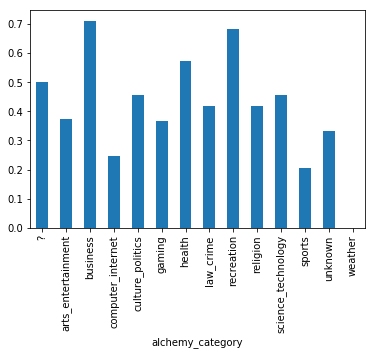

In [20]:
data.groupby('alchemy_category').label.mean().plot(kind='bar')

> ### Exercise: 5. How many articles are there per category?

In [23]:
# ... #
print data.alchemy_category.value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64


> #### Let's try extracting some of the text content.
> ### Exercise: 6. Create a feature for the title containing 'recipe'. 
Is the % of evegreen websites higher or lower on pages that have recipe in the the title?

In [29]:
data.title.isnull().sum()
#gives number of isnulls

12

In [35]:
a = 'Jack fell down the hill and cooked a Recipe'
print 'Jill' in a
print 'fell' in a
print 'jack' in a.lower() #because it is case-sensitive

False
True
True


In [39]:
def function_recipe(x):
    if x is None:
        return False
    if ('recipe' in x.lower()):
        return True
    else:
        return False




# ... #

In [40]:
#tells us if function works
function_recipe(a) 

True

In [41]:
data['recipe'] = data.title.map(function_recipe)

###  Let's Explore Some Decision Trees

 ### Demo: Build a decision tree model to predict the "evergreeness" of a given website. 

In [42]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

X = data[['image_ratio', 'html_ratio', 'recipe', 'label']].dropna()
y = X['label']
#had to drop the null values from label first
X.drop('label', axis=1, inplace=True)
    
    
# Fits the model
model.fit(X, y)

# Helper function to visualize Decision Trees (creates a file tree.png)

from sklearn.tree import export_graphviz
from os import system 
def build_tree_image(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model,
                              out_file = dotfile,
                              feature_names = X.columns)
    dotfile.close()
    #system("dot -Tpng tree.dot -o tree.png")
    
build_tree_image(model)

## Decision Trees in scikit-learn

 ### Exercise: Evaluate the decision tree using cross-validation; use AUC as the evaluation metric.

In [45]:
# ... #
from sklearn.model_selection import cross_val_score, cross_validate
#also can do
#from sklearn import model_selection
#then would have to say model_selection.cross_val_score()

cross_val_score(model, X, y, cv = 5, scoring = 'roc_auc').mean()
# cv = 5 means number of folds used

0.57069402627883525

###  Adjusting Decision Trees to Avoid Overfitting

 ### Demo: Control for overfitting in the decision model by adjusting the maximum number of questions (max_depth) or the minimum number of records in each final node (min_samples_leaf)

In [46]:
model = DecisionTreeClassifier(
                max_depth = 2,
                min_samples_leaf = 5)

model.fit(X, y)
build_tree_image(model)

 ### Demo: Build a random forest model to predict the evergreeness of a website. 

In [49]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20)
    
model.fit(X, y)
cross_val_score(model, X, y, cv = 5, scoring = 'roc_auc').mean()
#ends up being a better score

0.62870757466675264

In [53]:
model = RandomForestClassifier(n_estimators = 100)
    
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
cross_val_score(model, X, y)
#given three numbers because 3-fold, would then report the average
#why we did cross_val ... .mean()

array([ 0.57664234,  0.59188641,  0.58644481])

### Demo: Extracting importance of features

In [55]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
1,html_ratio,0.497659
0,image_ratio,0.412572
2,recipe,0.089769


tells us html_ratio is the most important feature among all of the variables we have

 ### Exercise: Evaluate the Random Forest model using cross-validation; increase the number of estimators and view how that improves predictive performance.

In [57]:
# ... #
cross_val_score(model, X, y, scoring = 'roc_auc').mean()

0.62882957205533241

##  Independent Practice: Evaluate Random Forest Using Cross-Validation

1. Continue adding input variables to the model that you think may be relevant
2. For each feature:
  - Evaluate the model for improved predictive performance using cross-validation
  - Evaluate the _importance_ of the feature
  - 
3. **Bonus**: Just like the 'recipe' feature, add in similar text features and evaluate their performance.


In [60]:
data.news_front_page.unique()

array(['0', '?', '1'], dtype=object)

In [70]:
#change the ? in news_front_page to 0's
data.news_front_page = data.news_front_page.map({'1': 1, '?': 0, '0': 0})

In [73]:
data.lengthyLinkDomain.unique()

array([1, 0])

In [77]:
# ... #

X = data[['image_ratio', 'news_front_page', 'html_ratio', 'lengthyLinkDomain', 'recipe', 'label']].dropna()
y = X['label']
#have to drop the null values from label first
X.drop('label', axis=1, inplace=True)

newmodel = RandomForestClassifier(max_depth = 20, min_samples_leaf = 5, n_estimators = 50)
cross_val_score(newmodel, X, y, scoring = 'roc_auc').mean()

0.65991913146470571

more features you throw in, the better the performance gets -- don't have to worry about overfitting